In [115]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [116]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [117]:
root = "/content/drive/MyDrive/Computer Vision Project 1/"

In [118]:
face_cascade = cv2.CascadeClassifier(os.path.join(root, 'haarcascade_frontalface_default.xml'))

### CelebA Dataset - 5 classes

In [119]:
num_classes = 5

In [120]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [121]:
len(images)

93

In [122]:
len(labels)

93

In [123]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [124]:
fisher_face_model = cv2.face.FisherFaceRecognizer_create()

In [125]:
fisher_face_model.train(X_train, np.asarray(y_train))

In [126]:
y_pred = []

for img in X_test:
    pred = fisher_face_model.predict(img)
    y_pred.append(pred[0])

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.50      0.67         2
           2       0.80      0.80      0.80         5
           3       0.67      1.00      0.80         4
           4       1.00      0.50      0.67         2

    accuracy                           0.79        19
   macro avg       0.86      0.73      0.75        19
weighted avg       0.82      0.79      0.78        19



True Label 0
Predicted Label 0


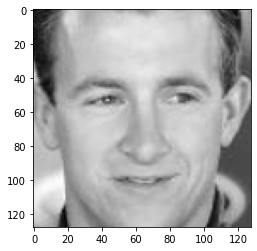

In [132]:
ind = 4
print("True Label", y_test[ind])
print("Predicted Label", y_pred[ind])
plt.imshow(X_test[ind], cmap="gray")
plt.show()

### CelebA Dataset - 10 classes

In [99]:
num_classes = 10

In [100]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [101]:
len(images)

170

In [102]:
len(labels)

170

In [103]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [104]:
fisher_face_model = cv2.face.FisherFaceRecognizer_create()

In [105]:
fisher_face_model.train(X_train, np.asarray(y_train))

In [106]:
y_pred = []

for img in X_test:
    pred = fisher_face_model.predict(img)
    y_pred.append(pred[0])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       1.00      0.33      0.50         3
           2       1.00      0.67      0.80         3
           3       0.50      0.75      0.60         4
           4       0.40      0.50      0.44         4
           5       1.00      1.00      1.00         1
           6       0.36      0.80      0.50         5
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.56        34
   macro avg       0.61      0.53      0.53        34
weighted avg       0.62      0.56      0.55        34



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Custom Dataset


In [73]:
num_classes = 4

In [74]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'Custom Dataset/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [75]:
len(images)

171

In [76]:
len(labels)

171

In [77]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [78]:
fisher_face_model = cv2.face.FisherFaceRecognizer_create()

In [79]:
fisher_face_model.train(X_train, np.asarray(y_train))

In [80]:
y_pred = []

for img in X_test:
    pred = fisher_face_model.predict(img)
    y_pred.append(pred[0])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

